In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from activate_functions import sigmoid
from cross_entropy import cross_entropy

# Data 

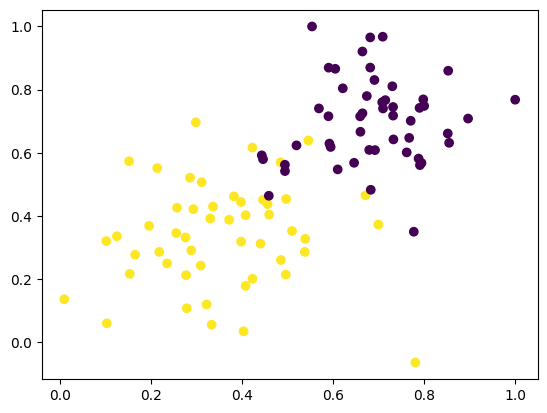

In [14]:
df = pd.read_csv('data.csv')
plt.scatter(df['x1'], df['x2'], c=df['y'])

In [15]:
df


,x1,x2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1
...,...,...,...
95,0.77029,0.701400,0
96,0.73156,0.717820,0
97,0.44556,0.579910,0
98,0.85275,0.859870,0


In [16]:
class perceptron: 
    # Metodo constructor  
    def __init__(self, n_entradas):
        # Pesos aleatorios en funcion del número de entradas
        self.w = np.random.rand(n_entradas) 
        self.b = np.random.rand(1) 
        self.n = n_entradas


    # Función de entrenamiento del perceptron
    def train(self, x, y_obj, lr):
        # Salida con función escalón
        self.lr = lr
        self.s = []
        error = []
        x = np.transpose(x)
        for i in range(0, len(x)):
            self.s = (self.w.dot(x[i]) + self.b)
            self.y = sigmoid(self.s)
            
            # Actualización de los pesos y bias

            de_w = self.y*(1-self.y)*x[i]
            de_b = -(y_obj[i]-self.y)
            self.w = self.w - lr*(self.y - y_obj[i])*x[i]
            self.b = self.b - lr*(self.y - y_obj[i])

    # Predicción del resultado
    def predict(self, x):
        # Salida en base a los pesos finales 
        out2 = []
        out = np.array(x).dot(self.w) + self.b 
        for i in range(len(out)):
            if out[i] > 0:
                out1 = 1
            else:
                out1 = 0 
        return out1

In [17]:
# Creación del objeto perceptron
perceptron_model_sm = perceptron(2)
# Creación de variable para guardar pesos
w_epoch = []
b_epoch = []
out_epoch = []
# Recorre los datos por el numero de epocas definidas
for epochs in range(0,100):
    m = 0
    # Llama al metodo train pasando los datos de entrenamiento [x1,x2], salida deseada [y] y learning rate
    s = perceptron_model_sm.train([df['x1'], df['x2']], df['y'], 0.01)
    # Hace la predicción en base a los pesos obtenidos. El metodo predict recibe los datos [x1,x2] 
    for i in range(0,len(df)):
        out = perceptron_model_sm.predict([df['x1'][i], df['x2'][i]])
      
        #Contador de errores
        if out != df['y'][i]:
            m += 1

    w_epoch.append(perceptron_model_sm.w)
    b_epoch.append(perceptron_model_sm.b)
    
    print(f"Epoch: {epochs} Error: {m/len(df)}")

Epoch: 0 Error: 0.52
Epoch: 1 Error: 0.93
Epoch: 2 Error: 0.5
Epoch: 3 Error: 0.5
Epoch: 4 Error: 0.5
Epoch: 5 Error: 0.5
Epoch: 6 Error: 0.5
Epoch: 7 Error: 0.5
Epoch: 8 Error: 0.5
Epoch: 9 Error: 0.5
Epoch: 10 Error: 0.5
Epoch: 11 Error: 0.48
Epoch: 12 Error: 0.48
Epoch: 13 Error: 0.48
Epoch: 14 Error: 0.45
Epoch: 15 Error: 0.41
Epoch: 16 Error: 0.38
Epoch: 17 Error: 0.37
Epoch: 18 Error: 0.35
Epoch: 19 Error: 0.32
Epoch: 20 Error: 0.3
Epoch: 21 Error: 0.3
Epoch: 22 Error: 0.3
Epoch: 23 Error: 0.28
Epoch: 24 Error: 0.27
Epoch: 25 Error: 0.24
Epoch: 26 Error: 0.23
Epoch: 27 Error: 0.21
Epoch: 28 Error: 0.2
Epoch: 29 Error: 0.19
Epoch: 30 Error: 0.18
Epoch: 31 Error: 0.18
Epoch: 32 Error: 0.18
Epoch: 33 Error: 0.16
Epoch: 34 Error: 0.15
Epoch: 35 Error: 0.14
Epoch: 36 Error: 0.14
Epoch: 37 Error: 0.14
Epoch: 38 Error: 0.13
Epoch: 39 Error: 0.12
Epoch: 40 Error: 0.1
Epoch: 41 Error: 0.09
Epoch: 42 Error: 0.09
Epoch: 43 Error: 0.09
Epoch: 44 Error: 0.09
Epoch: 45 Error: 0.09
Epoch: 46 Er

Text(0.5, 1.0, 'Model trained. Lr: 0.01 Error: 7.000000000000001%')

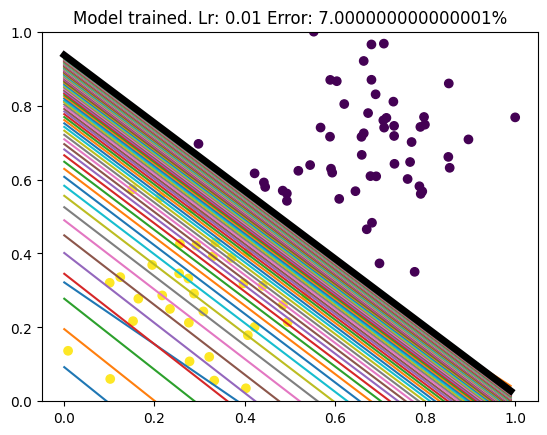

In [18]:
clasification = []
x_boundary = np.arange(0,1,0.01)
for i in range(0,len(df)):       
    out = perceptron_model_sm.predict([df['x1'][i], df['x2'][i]])
    clasification.append(out)

x_boundary = np.arange(0,1,0.01)
for i in range(0, len(w_epoch)):
    x2 = -x_boundary*(w_epoch[i][0]/w_epoch[i][1]) - b_epoch[i]/w_epoch[i][1]
    plt.plot(x_boundary, x2)
    plt.ylim([0,1])
plt.plot(x_boundary, x2, linewidth=5, c='black')
plt.scatter(df['x1'], df['x2'], c=clasification)
plt.title(f"Model trained. Lr: {perceptron_model_sm.lr} Error: {m/len(df) * 100}%")